In [16]:
from fastai.vision import *
import fastai
import pandas as pd
import glob
%config Completer.use_jedi = False

In [5]:
fastai.__version__

'1.0.61'

In [8]:
annot_path = Path('/home/fredrikmathisen/Documents/data/2-class_data/anno_dest/')

In [98]:
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []
    list_with_cls = []
    final_list=[]
    for boxes in root.iter('object'):

        filename = str(root.find('filename').text)
        filename = filename+'.png'
        classes = str(boxes.find('name').text)

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [ymin, xmin, ymax, xmax]
        list_with_all_boxes.append(list_with_single_boxes)
        list_with_cls.append(classes)
        #final_list.append(tuple((list_with_single_boxes, classes)))

    return filename, list_with_all_boxes, list_with_cls

name, boxes, cls = read_content(str(annot_path)+ "/000001.xml")
lbl2bbox = tuple((boxes,cls))

In [110]:
name

'000001.png'

In [111]:
boxes

[[22, 18, 36, 151], [43, 18, 56, 170], [62, 19, 72, 151], [81, 21, 94, 124]]

In [112]:
cls

['background', 'text', 'background', 'background']

In [123]:
lbl2bbox

([[22, 18, 36, 151], [43, 18, 56, 170], [62, 19, 72, 151], [81, 21, 94, 124]],
 ['background', 'text', 'background', 'background'])

In [128]:
img2bbox = dict(zip([name],[lbl2bbox]))

In [129]:
img2bbox['000001.png']

([[22, 18, 36, 151], [43, 18, 56, 170], [62, 19, 72, 151], [81, 21, 94, 124]],
 ['background', 'text', 'background', 'background'])

In [130]:
img = open_image('/home/fredrikmathisen/Documents/data/2-class_data/img_dest/000001.png')

In [131]:
bbox = ImageBBox.create(*img.size, img2bbox['000001.png'][0])

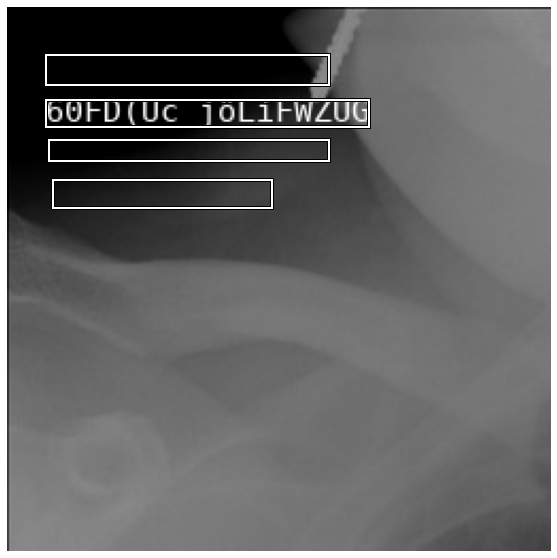

In [132]:
img.show(figsize=(10,10),y=bbox)

In [17]:
input_xml_list = glob.glob(str(annot_path) + '/*.xml')

In [136]:
#(input_xml_list)

In [139]:
for files in range(len(input_xml_list)):
    names, bboxes, cls = read_content(files)

NameError: name 'i' is not defined